### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore",DeprecationWarning)

&nbsp;

### Loading Dataset

In [5]:
filepath = os.getcwd()+"/tennis.csv"
df = pd.read_csv(filepath)
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


&nbsp;

### Descriptive Analysis

In [6]:
print('columns : {}\n'.format(df.columns.tolist()))
print('Data Shape : {}\n'.format(df.shape))
print(df.info())
print("\n")
print(df.isnull().sum())

columns : ['outlook', 'temp', 'humidity', 'windy', 'play']

Data Shape : (14, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play        14 non-null object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes
None


outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64


&nbsp;

### Manual Calculation<span style='background:yellow'>(Classification_using_Bayes_Theorem)<span> Categorical variables

In [7]:
prob_yes = round(df[df['play']=='yes']['play'].count()/len(df),3)
prob_no = round(df[df['play']=='no']['play'].count()/len(df),3)
print('Play_yes count : {}\n'.format(df[df['play']=='yes']['play'].count()))
print('play_no count : {}\n'.format(df[df['play']=='no']['play'].count()))
print('Probobality of class-yes : {}\n'.format(prob_yes))
print('Probabality pf class-no : {}'.format(prob_no))

Play_yes count : 9

play_no count : 5

Probobality of class-yes : 0.643

Probabality pf class-no : 0.357


&nbsp;

### Prior Probabillities and Evidences(which we know through Training Dataset)

In [8]:
print("================Outlook===================")
sunny_count = df[(df['outlook']=='sunny')]['play'].count()
sunny_yes_count = df[(df['outlook']=='sunny')&(df['play']=='yes')]['play'].count()
sunny_no_count = df[(df['outlook']=='sunny')&(df['play']=='no')]['play'].count()
overcast_count = df[(df['outlook']=='overcast')]['play'].count()
overcast_yes_count = df[(df['outlook']=='overcast')&(df['play']=='yes')]['play'].count()
overcast_no_count = df[(df['outlook']=='overcast')&(df['play']=='no')]['play'].count()
rainy_count = df[(df['outlook']=='rainy')]['play'].count()
rainy_yes_count = df[(df['outlook']=='rainy')&(df['play']=='yes')]['play'].count()
rainy_no_count = df[(df['outlook']=='rainy')&(df['play']=='no')]['play'].count()
print('sunny_count,sunny_yes_count, sunny_no_count : [{},{},{}]\n'.format(sunny_count,sunny_yes_count,sunny_no_count))
print('overcast_count,overcast_yes_count, overcast_no_count : [{},{},{}]\n'.format(overcast_count,overcast_yes_count,overcast_no_count))
print('rainy_count,rainy_yes_count, rainy_no_count : [{},{},{}]\n\n\n'.format(rainy_count,rainy_yes_count,rainy_no_count))

print("================Temp===================")
hot_count = df[(df['temp']=='hot')]['play'].count()
hot_yes_count = df[(df['temp']=='hot')&(df['play']=='yes')]['play'].count()
hot_no_count = df[(df['temp']=='hot')&(df['play']=='no')]['play'].count()
cool_count = df[(df['temp']=='cool')]['play'].count()
cool_yes_count = df[(df['temp']=='cool')&(df['play']=='yes')]['play'].count()
cool_no_count = df[(df['temp']=='cool')&(df['play']=='no')]['play'].count()
mild_count = df[(df['temp']=='mild')]['play'].count()
mild_yes_count = df[(df['temp']=='mild')&(df['play']=='yes')]['play'].count()
mild_no_count = df[(df['temp']=='mild')&(df['play']=='no')]['play'].count()
print('hot_count,hot_yes_count, hot_no_count : [{},{},{}]\n'.format(hot_count,hot_yes_count,hot_no_count))
print('cool_count,cool_yes_count, cool_no_count : [{},{},{}]\n'.format(cool_count,cool_yes_count,cool_no_count))
print('mild_count,mild_yes_count, mild_no_count : [{},{},{}]\n\n\n'.format(mild_count,mild_yes_count,mild_no_count))

print("================Humidity===================")
high_count = df[(df['humidity']=='high')]['play'].count()
high_yes_count = df[(df['humidity']=='high')&(df['play']=='yes')]['play'].count()
high_no_count = df[(df['humidity']=='high')&(df['play']=='no')]['play'].count()
normal_count = df[(df['humidity']=='normal')]['play'].count()
normal_yes_count = df[(df['humidity']=='normal')&(df['play']=='yes')]['play'].count()
normal_no_count = df[(df['humidity']=='normal')&(df['play']=='no')]['play'].count()
print('high_count, high_yes_count, high_no_count : [{},{},{}]\n'.format(high_count,high_yes_count,high_no_count))
print('normal_count, normal_yes_count, normal_no_count : [{},{},{}]\n\n\n'.format(normal_count,normal_yes_count,normal_no_count))

print("================Windy===================")
true_count = df[(df['windy']==True)]['play'].count()
true_yes_count = df[(df['windy']==True)&(df['play']=='yes')]['play'].count()
true_no_count = df[(df['windy']==True)&(df['play']=='no')]['play'].count()
false_count = df[(df['windy']==False)]['play'].count()
false_yes_count = df[(df['windy']==False)&(df['play']=='yes')]['play'].count()
false_no_count = df[(df['windy']==False)&(df['play']=='no')]['play'].count()
print('true_yes_count, true_no_count : [{},{},{}]\n'.format(true_count,true_yes_count,true_no_count))
print('false_yes_count, false_no_count : [{},{},{}]\n\n\n'.format(false_count,false_yes_count,false_no_count))


================Outlook===================
sunny_count,sunny_yes_count, sunny_no_count : [5,2,3]

overcast_count,overcast_yes_count, overcast_no_count : [4,4,0]

rainy_count,rainy_yes_count, rainy_no_count : [5,3,2]



================Temp===================
hot_count,hot_yes_count, hot_no_count : [4,2,2]

cool_count,cool_yes_count, cool_no_count : [4,3,1]

mild_count,mild_yes_count, mild_no_count : [6,4,2]



================Humidity===================
high_count, high_yes_count, high_no_count : [7,3,4]

normal_count, normal_yes_count, normal_no_count : [7,6,1]



================Windy===================
true_yes_count, true_no_count : [6,3,3]

false_yes_count, false_no_count : [8,6,2]





### Posterior Probability(which tells us class probability using prior probabilities and evidences)

##### Question 1 : Players will play if weather is sunny. Is this statement is correct?

In [9]:
###############Bayes Theorem Rule(as per above question)################
########################################################################

#p(play|sunny) = (p(sunny|play) * p(play))/p(sunny)

p_play = prob_yes
p_sunny = sunny_count/len(df)
p_sunny_given_play = (2/9)#(if it is sunny 2 people are playing : true i.e., sunny_yes_count/ total 9 people playing in data)

p_play_given_sunny = round((p_sunny_given_play * p_play)/(p_sunny),2)
print('Probability of playing, while given it is sunny : {}'.format(p_play_given_sunny))

#Will calculate not playing prob. on sunny
#p(notplay|sunny) = ((p(sunny|notplay)* p(notplay))/p(sunny))
p_notplay = prob_no
p_sunny = sunny_count/len(df)
p_sunny_given_notplay = (3/5)#(if it is sunny 3 people are not playing sunny_no_count/ total 5 people not playing in data)

p_notplay_given_sunny = round(((p_sunny_given_notplay * p_notplay)/p_sunny),2)
print('Probability of not playing, while given it is sunny : {}'.format(p_notplay_given_sunny))

Probability of playing, while given it is sunny : 0.4
Probability of not playing, while given it is sunny : 0.6


### Key point :
* We can see prob. of not playing > prob. of playing.
* Hence people would not like to play on sunny day.
* We can also add more conditions(temp,humidity and windy) to check prob. of playing and not playing, considering each condition or variable is independent of others.

##### Question 2 : Players will play if weather is sunny and hot. Is this statement is correct?

In [10]:
#p(play|sunny,hot) = (p(sunny|play) * p(hot|play) * p(play))/(p(sunny)*p(hot))

p_play = prob_yes
p_sunny = sunny_count/len(df)
p_hot = hot_count/len(df)
p_sunny_given_play = (2/9)#(if it is sunny 2 people are playing : true i.e., sunny_yes_count/ total 9 people playing in data)
p_hot_given_play = (2/9)#(if it is hot 2 people are playing : true i.e., hot_yes_count/ total 9 people playing in data)

p_play_given_sunny_hot = round((p_sunny_given_play * p_hot_given_play * p_play)/(p_sunny * p_hot),3)
print('Probability of playing, while given it is sunny & hot: {}'.format(p_play_given_sunny_hot))

#Will calculate not playing prob. on sunny and hot
#p(notplay|sunny,hot) = ((p(sunny|notplay)*p(hot|notplay)*p(notplay))/(p(sunny)*p(hot))
p_notplay = prob_no
p_sunny = sunny_count/len(df)
p_hot = hot_count/len(df)
p_sunny_given_notplay = (3/5)#(if it is sunny 3 people are not playing sunny_no_count/ total 5 people not playing in data)
p_hot_given_notplay = (2/5)#(if it is hot 2 people are not playing hot_no_count/ total 5 people not playing in data)

p_notplay_given_sunny_hot = round(((p_sunny_given_notplay * p_hot_given_notplay * p_notplay)/p_sunny*p_hot),3)
print('Probability of not playing, while given it is sunny & hot: {}'.format(p_notplay_given_sunny))

Probability of playing, while given it is sunny & hot: 0.311
Probability of not playing, while given it is sunny & hot: 0.6


### Key point :
* We can see prob. of not playing > prob. of playing.
* Hence people would not like to play on sunny day.
* outlook-temp-humidity-windy-play
> * sunny-hot-high-False-no
> * sunny-hot-high-True-no
> * overcast-hot-high-False-yes
> * sunny-mild-high-False-no
> * sunny-cool-normal-False-yes
> * sunny-mild-normal-True-yes
> * overcast-hot-normal-False-yes
* Here sunny(2_play,3_notplay) and hot(2_play,2_notplay), so notplay has little high count and getting high not_play prob. value.
* Here Bayes theorem doesn't consider two variables case(i.e.,outlook-sunny and temp-hot) counts or probabilities values combindly, it just get individual variable case values(sunny) and probabilities and multiplies with other case values(hot).
* But if it checks combined(sunny and hot) probability for class(play or notplay) it would be more good.
* Hence Bayes theorem(Naive Bayes, which considers independent or no relations between variables) for generating posterior probability for class based each case prior probability and evidences.
* As per my understanding is, (Bayes Theorem)Naive Bayes will be good on cases like : - less number of variables and internally having no relation between them.
* But sometimes one variable also has effect on other where we should not use bayes theorem(naive bayes).

&nbsp;

### Naive Bayes(i.e.,Bayes Theorem) Model on Categorical variables

In [170]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.simplefilter("ignore",DeprecationWarning)
warnings.filterwarnings("ignore")

In [171]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [172]:
df_new = copy.deepcopy(df)
df_new['outlook'] = labelencoder.fit_transform(df[['outlook']])
df_new['temp'] = labelencoder.fit_transform(df[['temp']])
df_new['humidity'] = labelencoder.fit_transform(df[['humidity']])
df_new['windy'] = labelencoder.fit_transform(df[['windy']])
df_new['play'] = labelencoder.fit_transform(df[['play']])
df_new.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [185]:
model_g = GaussianNB()
model_g.fit(df_new[["outlook","temp"]],df_new["play"])

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 1.0, 'Frequency counts')

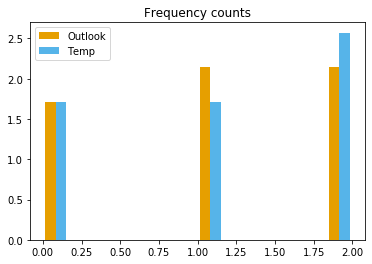

In [186]:
colors = ['#E69F00', '#56B4E9']
names = ['Outlook','Temp']
plt.hist([df_new["outlook"], df_new["temp"]], bins = int(180/15), normed=True,
         color = colors, label=names)
plt.legend()
# plt.xlabel('')
# plt.ylabel('')
plt.title('Frequency counts')

In [180]:
pred = model_g.predict([[2,1]]) #Question 2 : Players will play if weather is sunny and hot. Is this statement is correct?
print(pred)

model_g.predict_proba([[2,1]])

[0]


array([[0.70885451, 0.29114549]])

In [183]:
model_m = MultinomialNB()
model_m.fit(df_new[["outlook","temp"]],df_new["play"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [184]:
pred = model_m.predict([[2,1]]) #Question 2 : Players will play if weather is sunny and hot. Is this statement is correct?
print(pred)

model_m.predict_proba([[2,1]])

[1]


array([[0.42833319, 0.57166681]])

#### Key Note:
* Here GaussianNaiveBayes giving accurate results rather than MultinomialNaiveBayes.
* Even in some blogs people are using GaussinaNaiveBayes eventhough predictors having discrete values. May be these discrete value showing normal distribution that's why guassian naive bayes working good on this.
* We can see prob. of not playing[class_0] > prob. of playing[class_1].
* Hence, it is predicting if it is sunny, and hot. People would not like to play.
* Therefore, manual and ML algorithm prediction matched(some variation will be there in probabilities, beacuse of some internal weitages in ML algorithm)

&nbsp;

### Naive Bayes(Gaussian Distribution) Manual Calculation

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

In [102]:
filepath = os.getcwd()+"/Social_Network_Ads.csv"
Data = pd.read_csv(filepath,delimiter='\t')
Data_backup = pd.read_csv(filepath,delimiter='\t')
Data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
Data['Age'] = minmax_scale(Data['Age'])
Data['EstimatedSalary'] = minmax_scale(Data['EstimatedSalary'])

In [104]:
X = Data.iloc[:,[2,3]]
y = Data.iloc[:,[4]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=101)

df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(df_train.shape, df_test.shape)

(320, 2) (320, 1)
(80, 2) (80, 1)
(320, 3) (80, 3)


In [105]:
df_train_0 = df_train[df_train['Purchased']==0][['Age', 'EstimatedSalary']].values.tolist()
df_train_1 = df_train[df_train['Purchased']==1][['Age', 'EstimatedSalary']].values.tolist()
df_test_0 = df_test[df_test['Purchased']==0][['Age', 'EstimatedSalary']].values.tolist()
df_test_1 = df_test[df_test['Purchased']==1][['Age', 'EstimatedSalary']].values.tolist()

In [106]:
print(df_train_0[0])
print(df_train_1[0])
print(df_test_0[0])
print(df_test_1[0])

[0.23809523809523808, 0.32592592592592595]
[0.6428571428571428, 0.08148148148148147]
[0.19047619047619052, 0.4222222222222222]
[0.4523809523809524, 0.9555555555555555]


In [107]:
train_0_mean = np.mean(df_train_0)
train_1_mean = np.mean(df_train_1)
train_0_std = np.std(df_train_0)
train_1_std = np.std(df_train_1)

In [108]:
df_test_0[0]

[0.19047619047619052, 0.4222222222222222]

In [123]:
print(df_test.head(1))
print('\n')
print(Data.iloc[38,:])
print('\n')
print(Data_backup.iloc[38,:])

         Age  EstimatedSalary  Purchased
38  0.190476         0.422222          0


User ID            15671766
Gender               Female
Age                0.190476
EstimatedSalary    0.422222
Purchased                 0
Name: 38, dtype: object


User ID            15671766
Gender               Female
Age                      26
EstimatedSalary       72000
Purchased                 0
Name: 38, dtype: object


&nbsp;

##### Question 1: Age:26, EstimatedSalary:72000, as per data he will not purchase.

In [210]:
prob_0 = np.exp(-(df_test_0[0]-train_0_mean)**2/(2*train_0_std**2))*(1/(np.sqrt(2*np.pi)*train_0_std))
print('Probability of 0 :')
print(prob_0)
prob_0 = np.prod(prob_0)
print(prob_0)
print('1.51385592 * 1.99798931',1.51385592*1.99798931)
prob_0  = prob_0 * (len(df_train_0)/len(df_train))
print('----------------------')
print('prob_0 :',prob_0,'\n')

prob_1 = np.exp(-(df_test_0[0]-train_1_mean)**2/(2*train_1_std**2))*(1/(np.sqrt(2*np.pi)*train_1_std))
print('Probability of 1 :')
print(prob_1)
prob_1 = np.prod(prob_1)
print(prob_1)
print('0.4786893 * 1.20516969',0.4786893*1.20516969)
prob_1 = prob_1 * (len(df_train_1)/len(df_train))
print('----------------------')
print('prob_1 :',prob_1,'\n')


print('prediction :',1*(prob_1>prob_0))

Probability of 0 :
[1.51385592 1.99798931]
3.0246679448692326
1.51385592 * 1.99798931 3.024667945040215
----------------------
prob_0 : 1.9187737275264196 

Probability of 1 :
[0.4786893  1.20516969]
0.5769018401035568
0.4786893 * 1.20516969 0.576901835287317
----------------------
prob_1 : 0.21092973528786296 

prediction : 0


### Key Note:
* pro_0 > prob_1, hence as per manual calculations he will not purchase.

In [122]:
print(df_test_1[0],'\n')
print(df_test[df_test['Purchased']==1].loc[222,:],'\n')
print(Data_backup.iloc[222,:])

[0.4523809523809524, 0.9555555555555555] 

Age                0.452381
EstimatedSalary    0.955556
Purchased          1.000000
Name: 222, dtype: float64 

User ID            15694879
Gender                 Male
Age                      37
EstimatedSalary      144000
Purchased                 1
Name: 222, dtype: object


&nbsp;

##### Question 2: Age:37, EstimatedSalary:144000, as per data he will purchase.

In [211]:
prob_0  = np.exp(-(df_test_1[0]-train_0_mean)**2/(2*train_0_std**2))*(1/(np.sqrt(2*np.pi)*train_0_std))
print('Probability of 0 :')
print(prob_0)
prob_0 = np.prod(prob_0)
print(prob_0)
print('1.84200157 * 0.00879096',1.84200157*0.00879096)
prob_0  = prob_0 * (len(df_train_0)/len(df_train))
print('----------------------')
print('prob_0 :',prob_0,'\n')


prob_1 = np.exp(-(df_test_1[0]-train_1_mean)**2/(2*train_1_std**2))*(1/(np.sqrt(2*np.pi)*train_1_std))
print('Probability of 1 :')
print(prob_1)
prob_1 = np.prod(prob_1)
print(prob_1)
print('1.28700013*0.6052632',1.28700013*0.6052632)
prob_1 = prob_1 * (len(df_train_1)/len(df_train))
print('----------------------')
print('prob_1 :',prob_1,'\n')


print('prediction :',1*(prob_1>prob_0))

Probability of 0 :
[1.84200157 0.00879096]
0.016192956842772128
1.84200157 * 0.00879096 0.0161929621218072
----------------------
prob_0 : 0.01027240699713357 

Probability of 1 :
[1.28700013 0.6052632 ]
0.7789738171443895
1.28700013*0.6052632 0.778973817084216
----------------------
prob_1 : 0.2848123018934174 

prediction : 1


### Key Note:
* pro_1 > prob_0, hence as per manual calculations he will not purchase.(which is correct)

&nbsp;

&nbsp;

### Take Away Points(Gaussian Naive Bayes):
* np.prod([8,2]) = 16, means it multiplication of two values.
* Here we are seperating two sets of train data, by filtering class = [0,1]
* Then getting mean and standard deviation of each set of data.
* When new test data point comes, & we tries to get probability value according to each set[0,1](mean, stdev).
* Here probability calculation is :same joint probability(it means multiplying probabilities)
* prob class 0 : ((X1[0].prob * X2[0].prob..) * (x[0].size/len(df_train)) ) 
> * i.e.,np.exp(-(df_test_1[0]-train_0_mean)**2/(2*train_0_std**2))*(1/(np.sqrt(2*np.pi)*train_0_std))
> * Here we are checking test data point in X_train_0 probability distribution (Gaussian distribution) 
* prob class 1 : ((X1[1].prob * X2[1].prob..) * (x[1].size/len(df_train)) ) 
> * np.exp(-(df_test_1[0]-train_1_mean)**2/(2*train_1_std**2))*(1/(np.sqrt(2*np.pi)*train_1_std))
> * > * Here we are checking test data point in X_train_1 probability distribution (Gaussian distribution)
* Therefore, in simple we check test data point in both X_train_0 and X_train_1 distributions data get probabilities of it and see in which distributions(X_train_0 and X_train_1) test_data point has higher probability and consider it as its class 0 or 1. This can be extended more than 2 classes.

&nbsp;

### Naive Bayes(Gaussian Distribution) Model

In [195]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##### Question 1: Age:26, EstimatedSalary:72000, as per data he will not purchase.

In [206]:
# Predicting the Test set results
print([df_test_0[0]],'\n')
# print(df_test_0[0])

y_pred = classifier.predict([df_test_0[0]])
print('prediction :',y_pred)

[[0.19047619047619052, 0.4222222222222222]] 

prediction : [0]


##### Question 2: Age:37, EstimatedSalary:144000, as per data he will purchase.

In [209]:
# Predicting the Test set results
print([df_test_1[0]],'\n')
# print(df_test_1[0])

y_pred = classifier.predict([df_test_1[0]])
print('prediction :',y_pred)

[[0.4523809523809524, 0.9555555555555555]] 

prediction : [1]


&nbsp;

### Key Note:
* Our manual calculation predictions and Model prediction both matched.